Running Thawing model...
Running Mirage model...
Running Emergent model...

DESI Dark Energy Model Results:
Thawing   : w0=-0.900, wa=-0.158
           Age=13.720 Gyr, h=0.6700

Mirage    : w0=-0.800, wa=-0.732
           Age=13.777 Gyr, h=0.6700

Emergent  : w0=-0.950, wa=-0.100
           Age=13.799 Gyr, h=0.6700



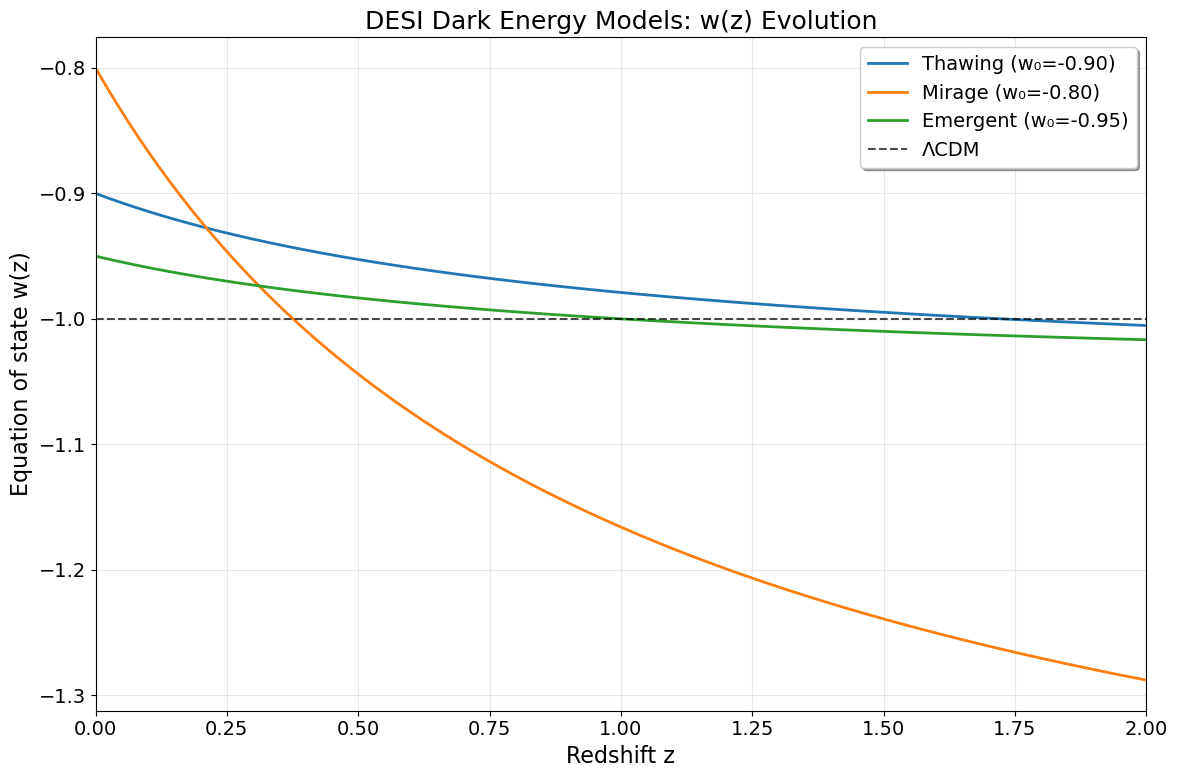

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

def run_desi_models():
    """
    Runs three dark energy models proposed in DESI DR2: Thawing, Mirage, Emergent.
    Computes age of universe and h, and plots w(z).    
    """
    
    # Base cosmological parameters (let CLASS calculate Omega_Lambda automatically)
    base_params = {
        'output': 'tCl,mPk',
        'h': 0.67,
        'omega_b': 0.022,
        'omega_cdm': 0.12,
        'A_s': 2.3e-9,
        'n_s': 0.965, 
        'tau_reio': 0.06,
        # Don't specify Omega_Lambda - let CLASS calculate it
        'Omega_fld': 0.7,   # Dark energy density
        'cs2_fld': 1,       # Sound speed squared
    }
    
    models = {}
    
    # 1. Thawing model (calibrated)
    print("Running Thawing model...")
    w0_thaw = -0.9
    wa_thaw = -1.58 * (1 + w0_thaw)
    
    cosmo_thaw = Class()
    params_thaw = base_params.copy()
    params_thaw.update({'w0_fld': w0_thaw, 'wa_fld': wa_thaw})
    cosmo_thaw.set(params_thaw)
    cosmo_thaw.compute()
    
    models['Thawing'] = {
        'w0': w0_thaw, 'wa': wa_thaw,
        'age': cosmo_thaw.age(),
        'h': cosmo_thaw.h()
    }
    
    # 2. Mirage model
    print("Running Mirage model...")
    w0_mirage = -0.8
    wa_mirage = -3.66 * (1 + w0_mirage)
    
    cosmo_mirage = Class()
    params_mirage = base_params.copy()
    params_mirage.update({'w0_fld': w0_mirage, 'wa_fld': wa_mirage})
    cosmo_mirage.set(params_mirage)
    cosmo_mirage.compute()
    
    models['Mirage'] = {
        'w0': w0_mirage, 'wa': wa_mirage,
        'age': cosmo_mirage.age(),
        'h': cosmo_mirage.h()
    }
    
    # 3. Emergent model (simplified) 
    print("Running Emergent model...")
    w0_emerg = -0.95
    wa_emerg = -0.1
    
    cosmo_emerg = Class()
    params_emerg = base_params.copy()
    params_emerg.update({'w0_fld': w0_emerg, 'wa_fld': wa_emerg})
    cosmo_emerg.set(params_emerg)
    cosmo_emerg.compute()
    
    models['Emergent'] = {
        'w0': w0_emerg, 'wa': wa_emerg,
        'age': cosmo_emerg.age(),
        'h': cosmo_emerg.h()
    }
    
    
    # Print results
    print("\nDESI Dark Energy Model Results:")
    print("="*50)
    for name, model in models.items():
        print(f"{name:10s}: w0={model['w0']:6.3f}, wa={model['wa']:6.3f}")
        print(f"           Age={model['age']:6.3f} Gyr, h={model['h']:6.4f}")
        print()
    
    # Plot w(z) evolution
    z_array = np.linspace(0, 2, 100)
    plt.figure(figsize=(12, 8))  # Make it bigger
    plt.rcParams.update({'font.size': 14})  # Bigger fonts
    
    for name, model in models.items():
        w0, wa = model['w0'], model['wa']
        a_array = 1 / (1 + z_array)
        w_z = w0 + wa * (1 - a_array)
        plt.plot(z_array, w_z, linewidth=2, label=f"{name} (w₀={w0:.2f})")
    
    # ΛCDM for comparison
    plt.axhline(-1, color='black', linestyle='--', alpha=0.7, label='ΛCDM')
    
    plt.xlabel('Redshift z', fontsize=16)
    plt.ylabel('Equation of state w(z)', fontsize=16)
    plt.title('DESI Dark Energy Models: w(z) Evolution', fontsize=18)
    plt.legend(fontsize=14, frameon=True, fancybox=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 2)
    
    # save the plot
    plt.tight_layout()
    # Save plot as PNG (raster), with white background and no border
    plt.savefig('desi_w_evolution.png', dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none') #edgecolor optional
    # plt.savefig('desi_w_evolution.pdf', dpi=300, bbox_inches='tight',
    #             facecolor='white', edgecolor='none')                 # Vector format for LaTeX
    # plt.savefig('desi_w_evolution.eps', dpi=300, bbox_inches='tight'
    #             facecolor='white', edgecolor='none')                 # Alternative vector format
    
    plt.show()
    
    # Return the dictionary of model results for optional post-processing
    return models
    
# Run the models
results = run_desi_models()